**Import** **library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns

**Import** **Data**

In [3]:
df = pd.read_csv("/content/sample_data/auto-mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

**Data** **Preprocessing**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [37]:
from sklearn.preprocessing import LabelEncoder

In [35]:
non_numeric_columns = df.select_dtypes(include=['object']).columns

In [38]:
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [39]:
x=df.values

**Remove** **Missing** **Values**

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Data** **Visualization**

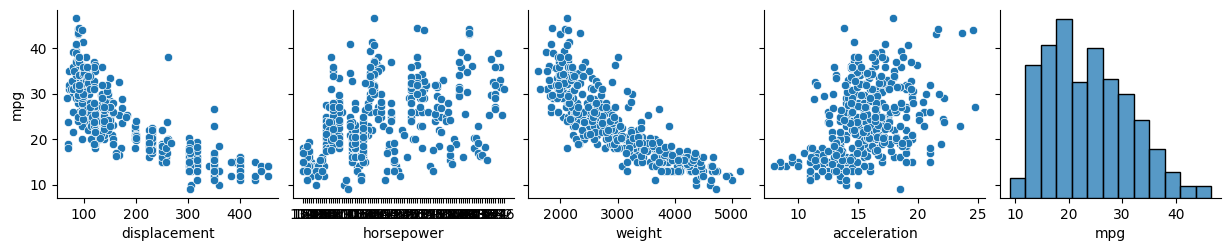

In [21]:
sns.pairplot(df, x_vars= ['displacement','horsepower','weight','acceleration','mpg'], y_vars=['mpg']);

<Axes: xlabel='displacement', ylabel='mpg'>

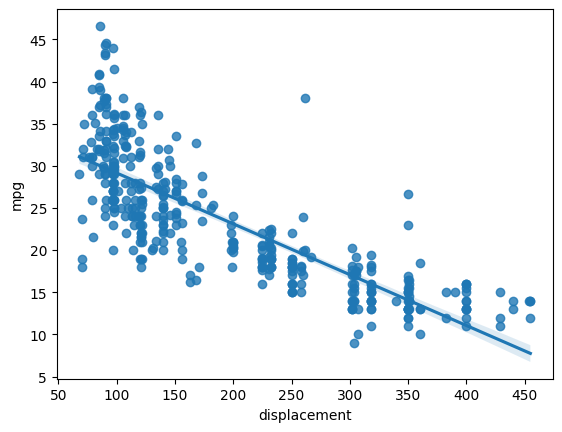

In [22]:
sns.regplot(x= 'displacement',y='mpg',data=df)

**Define** **target** **variable** **y** **and** **feature** **x**

In [23]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [24]:
y=df['mpg']

In [26]:
y.shape

(398,)

In [42]:
x=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [29]:
x.shape

(398, 4)

In [43]:
x

,displacement,horsepower,weight,acceleration
0,307.0,15,3504,12.0
1,350.0,33,3693,11.5
2,318.0,27,3436,11.0
3,304.0,27,3433,12.0
4,302.0,22,3449,10.5
...,...,...,...,...
393,140.0,80,2790,15.6
394,97.0,51,2130,24.6
395,135.0,78,2295,11.6
396,120.0,73,2625,18.6


**Scaling** **Data**

In [31]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss=StandardScaler()

In [45]:
x= ss.fit_transform(x)

In [46]:
x

array([[ 1.0906037 , -1.20561354,  0.63086987, -1.29549834],
       [ 1.5035143 , -0.59954973,  0.85433297, -1.47703779],
       [ 1.19623199, -0.801571  ,  0.55047045, -1.65857724],
       ...,
       [-0.56103873,  0.91560981, -0.79858454, -1.4407299 ],
       [-0.70507731,  0.74725875, -0.40841088,  1.10082237],
       [-0.71467988,  0.84826938, -0.29608816,  1.39128549]])

In [47]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.785283e-17,8.033775e-17,-1.606755e-16,-2.677925e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.204411e+00,-1.710667e+00,-1.604943e+00,-2.747814e+00
25%,-8.563178e-01,-8.268237e-01,-8.828266e-01,-6.328794e-01
50%,-4.314040e-01,3.095460e-01,-1.973624e-01,-2.472221e-02
75%,6.584879e-01,9.156098e-01,7.538337e-01,5.834349e-01
max,2.511784e+00,1.420663e+00,2.565185e+00,3.351912e+00


**Train** **Test** **Split** **Data**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2592)

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((278, 4), (120, 4), (278,), (120,))

**Linear** **Regression** **Model**

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr=LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
lr.intercept_

23.23589011700058

In [55]:
lr.coef_

array([-1.71052889,  0.18315052, -4.87140067,  0.27500486])

**Predict** **Test** **Data**

In [56]:
y_pred=lr.predict(x_test)

In [57]:
y_pred

array([19.58664517, 22.30074654, 26.83618953, 30.63558758, 32.3797703 ,
       14.51280836, 24.62383843, 12.8048512 , 19.8386913 , 26.83198709,
       20.87482862, 10.84980008, 24.34609597, 29.5343528 , 14.51216512,
       30.64754707,  8.28454427, 23.51114356, 13.84004612, 27.27301678,
       11.68224113, 16.36742321, 23.22742707, 32.03508628, 22.16962294,
        9.16233451, 15.6927224 , 29.74601668, 27.08782207, 22.56313356,
       22.95730222, 27.63688776, 32.86988333, 29.48009145, 18.69693658,
       31.73369674, 27.26420965, 26.97188336, 25.73137744, 21.42140816,
       29.25773275, 13.64118484, 19.91990018, 29.0377761 , 26.7164787 ,
       30.75367246, 28.18245931, 24.96721034, 13.81037259, 32.54293281,
       11.5079078 , 29.03083586, 10.45460044, 28.38010681, 12.13791007,
       18.81448617, 26.97157975, 30.9584799 , 20.30016855, 10.73722869,
        9.28015733, 10.82906819, 29.79330698,  9.9759254 , 11.09689309,
       22.73150483, 23.24052376, 14.97779507, 31.87861918, 14.55

**Model** **Accuracy**

In [58]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [59]:
mean_absolute_error(y_test,y_pred)

3.1326125746690026

In [60]:
mean_absolute_percentage_error(y_test,y_pred)

0.1387741491170236

In [61]:
r2_score(y_test,y_pred)

0.7190222142793665

**Polynomial** **Regression**

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [64]:
x_train2 = poly.fit_transform(x_train)

In [65]:
x_test2=poly.fit_transform(x_test)

In [70]:
lr.fit(x_train2,y_train)

LinearRegression()

In [71]:
lr.intercept_

21.550066585868947

In [72]:
lr.coef_

array([-2.91500011, -0.16697064, -4.66122153,  0.51845497, -1.01114758,
        2.19367321, -0.51744182,  1.17041143, -0.5415951 ,  0.65008046])

In [73]:
y_pred_poly=lr.predict(x_test2)

**Model** **Accuracy**

In [74]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [75]:
mean_absolute_error(y_test,y_pred_poly)

2.911799458185416

In [76]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12218053322769604

In [77]:
r2_score(y_test,y_pred_poly)

0.7383003211849377